# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

### Откройте файл с данными и изучите общую информацию. 

***`Описание данных`***


`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)  
`balcony` — число балконов  
`ceiling_height` — высота потолков (м)  
`cityCenters_nearest` — расстояние до центра города (м)  
`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)  
`first_day_exposition` — дата публикации  
`floor` — этаж  
`floors_total` — всего этажей в доме  
`is_apartment` — апартаменты (булев тип)  
`kitchen_area` — площадь кухни в квадратных метрах (м²)    
`last_price` — цена на момент снятия с публикации    
`living_area` — жилая площадь в квадратных метрах (м²)    
`locality_name` — название населённого пункта  
`open_plan` — свободная планировка (булев тип)  
`parks_around3000` — число парков в радиусе 3 км  
`parks_nearest` — расстояние до ближайшего парка (м)  
`ponds_around3000` — число водоёмов в радиусе 3 км  
`ponds_nearest` — расстояние до ближайшего водоёма (м)  
`rooms` — число комнат  
`studio` — квартира-студия (булев тип)  
`total_area` — общая площадь квартиры в квадратных метрах (м²)  
`total_images` — число фотографий квартиры в объявлении  



In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns  # импортируем все библиотеки, с которыми планируем работать

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep= '\t') # читаем csv-файл и записываем его в переменную data

In [3]:
data.head(10) # смотрим, как выглядит файл, с помощью метода .head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
# установим значение параметра, как показано ниже
pd.set_option('display.max_columns', None)

In [5]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [6]:
data.describe() # выводим общую информацию о DataFrame

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [7]:
data.info() # оценим информацию о DataFrame, тип индекса dtype и столбцы, непустые значения и использование памяти

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

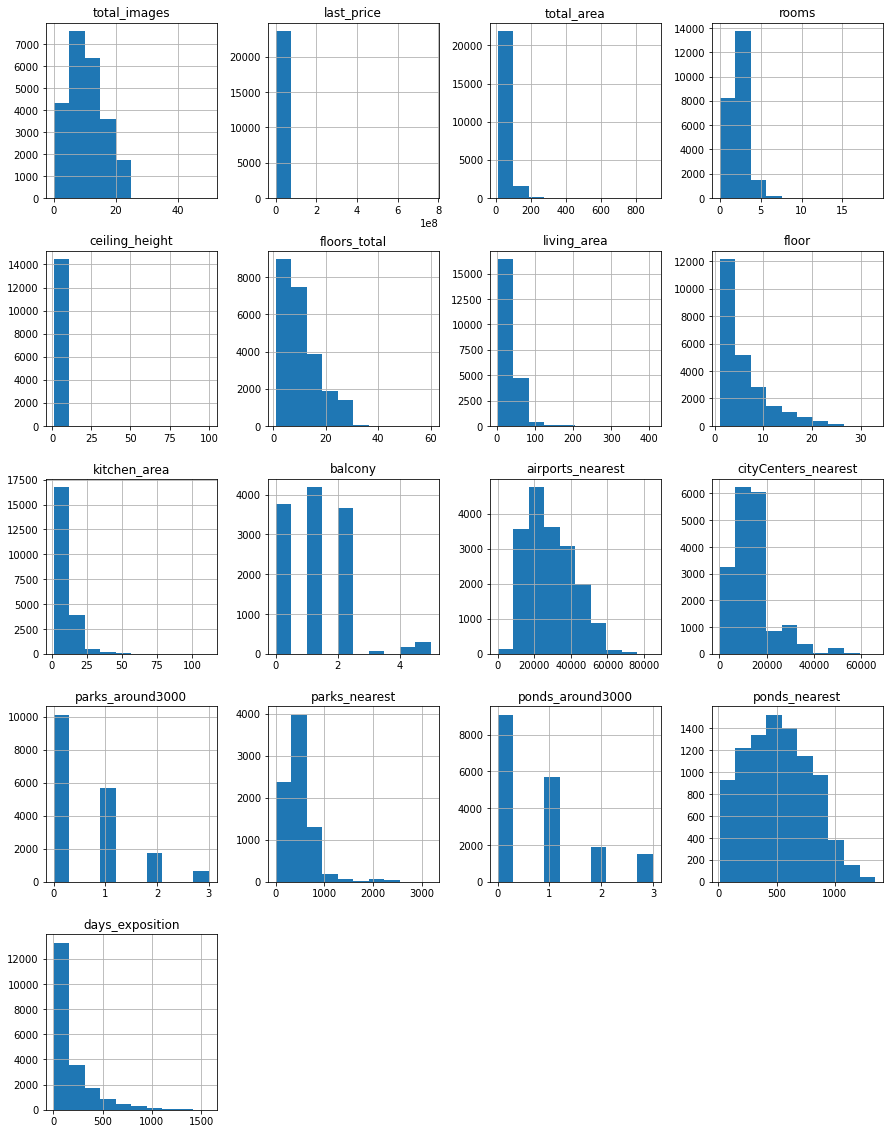

In [8]:
data.hist(figsize=(15, 20))
plt.show() # убираем грязь и технические строки

>В общих чертах данные выглядят вполне удовлетворительно, однако если рассматривать каждый из столбцов, то приходишь к выводу, что значений NaN очень много. Впечатлили так же 100-метровые потолки и 19-комнатные квартиры. Будем выяснять, где купить шторы 100-метровой длинны 😳

***`Выводы:`***

Присутствуют столбцы, лидирующие по количеству отсутствующих значений:  
is_apartment  
airports_nearest  
cityCenters_nearest  
parks_around3000  
ponds_around3000  

`is_apartment` - предположим, что "нет данных" там, где ответ - "0", т.е. это не апартаменты. Продавцы квартир скорее всего просто игнорировали этот пунк по незнанию. С заполненными данными ситуация ровно противоположная, поскольку владельцы апартаментов знают, что владеют апартаментами, поэтому данные заполнили верно;

`balcony` - скорее всего NaN - это отсутствие балкона. Нужно будет выяснить, присутствует ли только значение "1", означающее, что балкон есть, а "0", что балкона нет;

`parks_nearest`, `ponds_nearest` - чтобы не испортить статистику по уже существующим данным, коих нам хватит для создания среза и подсчета тенденций, предлагаю оставить их так, как есть;

`ceiling_height` - информация нужная и важная, но пропуски присутствуют. Предполагаю, что некоторым было лень измерять потолки и копаться в технических харрактеристиках своих объектов. Попробуем чем-то заполнить, скорее всего средним показателем; 

`days_exposition` - возможно после продажи продавец просто не закрыл сделку на ресурсе. Запролнять ничем не будем т.к. не всегда похожие параметры отражают похожую действительность именно в подобных случаях. (в одной квартире с данными параметрами тараканы размером с кота, а в другой, с теми же параметрами, чистота и запах горных орхидей); 

`airports_nearest` - заполнение данных произвела система. Возможно поиск отношения объект-объект, производился по радиусу и в этом радиусе просто не было аэропорта! Возможно. Поэтому пропуски в этом столбце мы трогать не будем;  
`cityCenters_nearest` - по ангалогии с airports_nearest;  
`parks_around3000` - по ангалогии с airports_nearest;  
`ponds_around3000` - по ангалогии с airports_nearest;  

`kitchen_area`, `living_area` - попробуем найти взаимосвязь отсутствия данных с тем, что кухня квартиры-студии - это часть основного помещения или найти кореляцию тех данных, что у нас есть и цены. Если она будет незначительной, то данные лучше не трогать. По поводу отсутствия, данные отсутствуют скорее по тому, что у продавца не было времени или была возможность необязательности заполнения именно этими данными, либо мы имеем дело с неполной выгрузкой.
`floors_total` - необязательность заполнения, вот возможная причина отсутствия данных в этом столбце. Если заполнить пропуски по правилам этажности застройки(центр Санкт-Петербурга малоэтажный), то выйдет вполне логично.  

`locality_name` - предположу, что пропуски появились по причине того, что продавцы думали, что на этом сайте квартиры покупают только в Санкт-Петербурге, обходя вниманием область. Но мы же уже посмотрели, что это нет так? Протяжённость Санкт-Петербурга с севера на юг 44 км., с запада на восток – 25 км. В идеале можно было бы заполнить пропуски в пределах 20-25 км от центра значением "Санкт-Петербург", однако в целом у нас эти данные не фигурируют в вопросах. Если нам потребуется провести анализ, то мы можем использовать срез данных, в котором эта информация уже присутствует в нужном для нас объеме. Поэтому не будем тратить драгоценные ресурсы, если этого делать не требуется. Однако на неявные дубликаты этот столбец проверить стоит, в нем они наверняка присутствуют.

`first_day_exposition` - тип object, поскольку у нас дата, то изменим тип на datetime.

Ну и название столбца `cityCenters_nearest` поменяем на более корректоное.
___

Приступим! 🤓

### Предобработка данных

In [9]:
data.rename(columns = {'cityCenters_nearest':'city_centers_nearest'}, 
inplace = True) # меняем название столбца
data.head(1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN


In [10]:
len(list(data['locality_name'].unique())) # смотрим наличие дубликатов

print('\nКоличество дубликатов:', data.duplicated().sum()) # выводим на экран количество дубликатов
print('\nКоличество неявных дубликатов:', len(list(data['locality_name'].unique()))) # смотрим и столбец locality_name на неявные дубликаты

data['locality_name'].unique() # визуализируем состав столбца'locality_name'




Количество дубликатов: 0

Количество неявных дубликатов: 365


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [11]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True)
data['locality_name'] = data['locality_name'].replace('Мур', 'Мурино', regex=True)
print('\nКоличество неявных дубликатов после обработки:', len(data['locality_name'].unique()))



Количество неявных дубликатов после обработки: 331


In [12]:
data['last_price'] = data['last_price'].astype('int') # меняем тип стоимости квартиры на int (целочисленный формат)
data['last_price'] 

0        13000000
1         3350000
2         5196000
3        64900000
4        10000000
           ...   
23694     9700000
23695     3100000
23696     2500000
23697    11475000
23698     1350000
Name: last_price, Length: 23699, dtype: int64

In [13]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d') # меняем столбец даты на тип даты без времени, т.к. время не указано
data['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

In [14]:
print('Количество NaN в столбце is_apartment:', data['is_apartment'].isnull().sum())    # считаем количество значений в столбце is_apartment
data['is_apartment'].value_counts() # считаем количество вхождений каждого элемента в столбце is_apartment

Количество NaN в столбце is_apartment: 20924


False    2725
True       50
Name: is_apartment, dtype: int64

В России такая вещь, как апартаменты не популярна, т.к. покупателю чаще всего нужна прописка, что невозможно осуществить в апартаментах. Возможно где-то в других странах это более популярно, например там, где широко развит туризм. Я было дело занесла пальцы в полукруг, чтобы заполнить пропуски значением False, но пытливое сознание остановило меня в этих действиях. Я пошла на сайт "Яндекс Недвижимость" и провела там небольшой эксперимент, в ходе которого выяснилось, что из общего количества предложенных вариантов с недвижимостью в Санкт-Петербурге и ЛО - 74747 объявлений, 2886 являются апартаментами. Для меня это стало открытием. Потом я посмотрела количество апартаментов только в пределах города, без области, выделив границы специальным карандашем. В него вошло почти то же количество апартаментов. Их много, но не настолько много, чтобы менять значение, например на True, иначе мы получим значительный перекос в пользу апартаментов(True-20974
False-2725), чего бизнес недвижимости, на данном этапе своего развития, пока еще не достиг.

In [15]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int') # Заменили пропущенные значения на ноль и изменили тип данных на int
data['balcony'] # смотрим, что получилось

0        0
1        2
2        0
3        0
4        0
        ..
23694    0
23695    0
23696    0
23697    2
23698    0
Name: balcony, Length: 23699, dtype: int64

In [16]:
data['parks_around3000'].value_counts()

0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

In [17]:
data['ponds_around3000'].value_counts()

0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64

Как и планировали, в столбцах parks_around3000 и 
ponds_around3000 заменять пропущенные значения
не будем, т.к. возможно, просто отсутствуют или не были выгружены данные по ним, тем более данных достаточно для создания среза и подсчета тенденций.
У нас не стоит задача получить как можно больше нулей и удаленных значений в статистике, у нас задача получить правильную статистику, такую как она есть. На мой взгляд, если мы без дополнительного анализа удалим или нулями заполним, мы картину датафрейма размажем до неузнаваемости.

In [18]:
data['locality_name'].isna().value_counts() # считаем количество пропущенных значений 


False    23650
True        49
Name: locality_name, dtype: int64

Столбец locality_name оставляем, как обсуждалось ранее.  

In [19]:
# Заполняем пропуски медианой
location_ceiling_height_median = data.pivot_table(index='locality_name', values='ceiling_height', aggfunc='median') 
location_ceiling_height_median.sort_values(by='ceiling_height', ascending=True) 
location_NaN = [] 
for location in data['locality_name'].unique(): 
    try: 
        data.loc[data['locality_name'] == location, 'ceiling_height'] = \
            data.loc[data['locality_name'] == location, 'ceiling_height'].fillna( 
                location_ceiling_height_median.loc[location, 'ceiling_height']) 
    except: 
        location_NaN.append(location) 
print(f'Locations with missing values: {location_NaN}')


Locations with missing values: ['деревня Пикколово', 'деревня Заклинье', 'поселок Севастьяново', nan, 'деревня Иссад', 'поселок станции Корнево', 'деревня Аро', 'село Паша', 'деревня Чудской Бор', 'поселок Петро-Славянка', 'деревня Старые Бегуницы', 'поселок Кобринское', 'деревня Мануйлово', 'деревня Пчева', 'поселок Цвылево', 'поселок Усть-Луга', 'поселок Селезнево', 'село Никольское', 'поселок Мыза-Ивановка', 'село Старая Ладога', 'деревня Лаврики', 'деревня Старое Хинколово', 'село Рождествено', 'деревня Старополье', 'поселок Левашово', 'садоводческое некоммерческое товарищество Лесная Поляна', 'поселок Каложицы', 'деревня Пельгора', 'поселок городского типа Лесогорский', 'деревня Торошковичи', 'поселок Белоостров', 'поселок Алексеевка', 'деревня Щеглово', 'деревня Сижно', 'поселок Форт Красная Горка', 'поселок городского типа Назия', 'поселок городского типа Вознесенье', 'поселок Тесово-4', 'деревня Курковицы', 'деревня Реброво', 'поселок Семиозерье', 'деревня Нижние Осельки', 'пос

In [20]:
data['ceiling_height'].describe()

count    23558.000000
mean         2.732502
std          1.004616
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [21]:
# убираем выбивающиеся значения
data.loc[data['ceiling_height'] >= 25, 'ceiling_height'] = data.loc[data['ceiling_height'] >= 25, 'ceiling_height'] / 10

In [22]:
data['ceiling_height'].isna().value_counts()

False    23558
True       141
Name: ceiling_height, dtype: int64

In [23]:
data['ceiling_height'].describe()

count    23558.000000
mean         2.708223
std          0.339472
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max         24.000000
Name: ceiling_height, dtype: float64

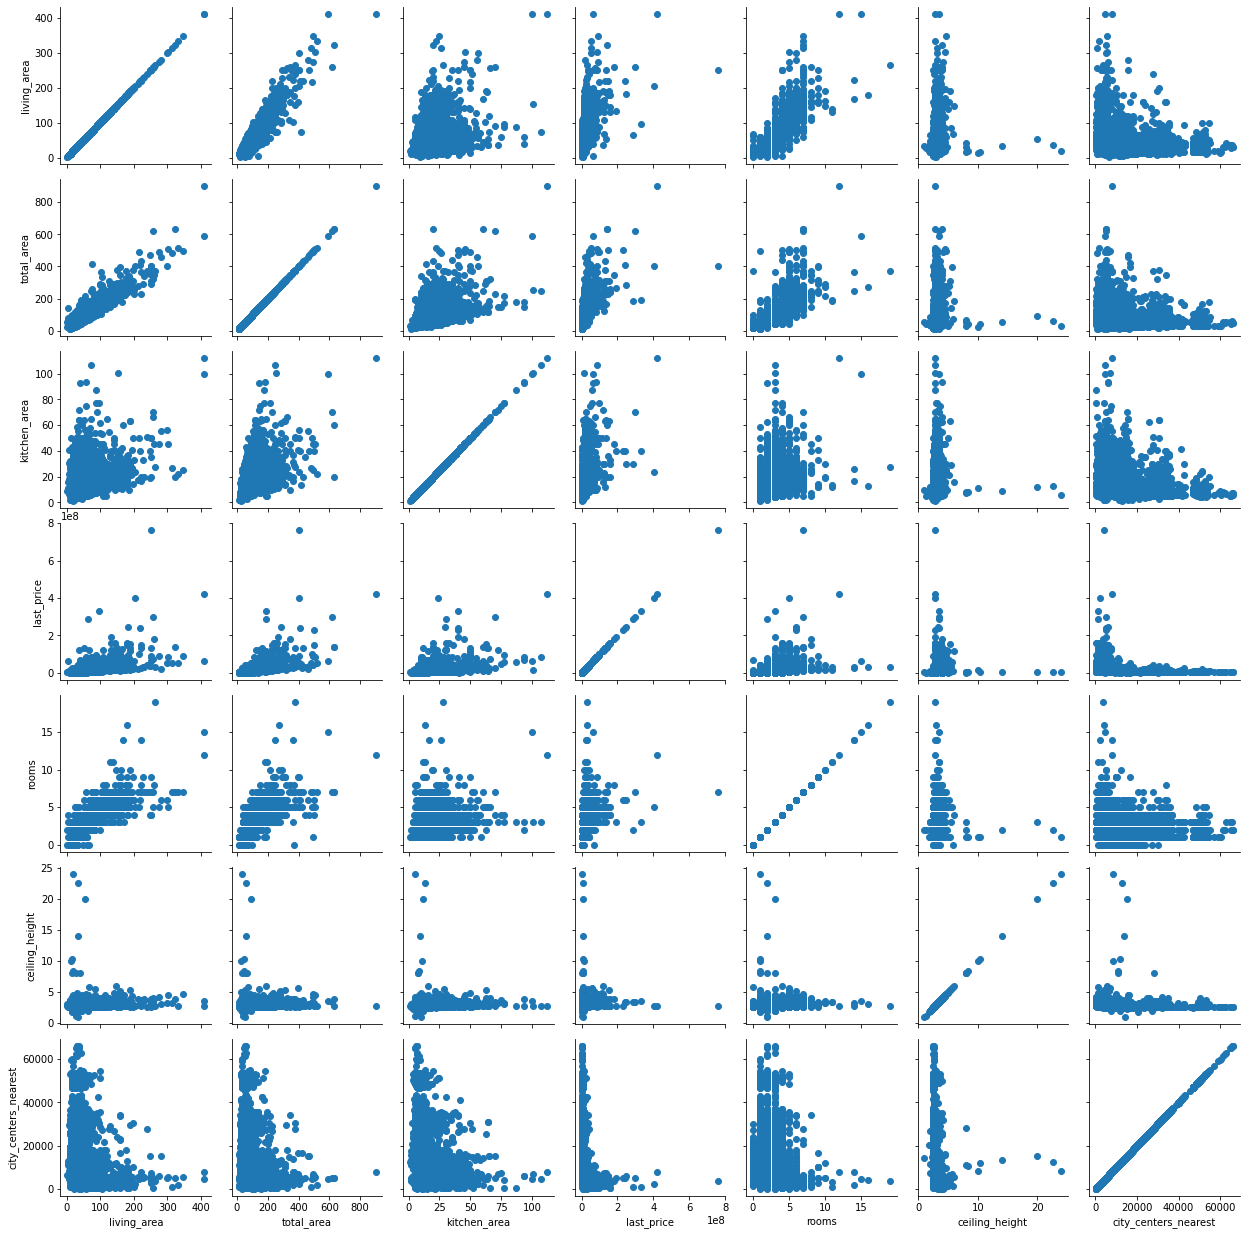

In [24]:
# в методе map указываем функцию plt.scatter что бы построить графики разброса в контексте тех переменных,
# которые указываем при создании сетки
g = sns.PairGrid(data.loc[:,['living_area', 'total_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'city_centers_nearest']])
g.map(plt.scatter); 


Любуемся результатом

In [28]:
# считаем количество пропущенных значений
data['living_area'].isna().value_counts() 

False    21796
True      1903
Name: living_area, dtype: int64

In [29]:
# считаем количество пропущенных значений
data['kitchen_area'].isna().value_counts() 

False    21421
True      2278
Name: kitchen_area, dtype: int64

Возможно площадь кухни коррелируется с количеством комнат, общей площадью квартиры, апартаментами. Смотрим.

In [30]:
data.query('kitchen_area > 0 and rooms > 0').loc[:,('kitchen_area', 'rooms', 'is_apartment', 'living_area')].corr()

,kitchen_area,rooms,living_area
kitchen_area,1.000000,0.269945,0.428674
rooms,0.269945,1.000000,0.850558
living_area,0.428674,0.850558,1.000000


In [31]:
corr_data = data.corr()
corr_data[['kitchen_area']].query('kitchen_area > 0.5 or kitchen_area < -0.5')


,kitchen_area
last_price,0.519869
total_area,0.609121
kitchen_area,1.000000


In [32]:
corr_data = data.corr()
corr_data[['living_area']].query('living_area > 0.5 or living_area < -0.5')

,living_area
last_price,0.566492
total_area,0.939537
rooms,0.845977
living_area,1.000000


    Значения коэффициента корреляции всегда расположены в диапазоне от -1 до 1 и интерпретируются следующим образом: если коэффициент корреляции близок к 1, то между переменными наблюдается положительная корреляция. Иными словами, отмечается высокая степень связи между переменными.
    На основе корреляционного анализа делаем вывод, что зависимость площади кухни имеется только с общей площадью и в незначительной степени с ценой. То же самое мы можем наблюдать в ситуации с жилой площадью.
    Для меня это значит, что мы можем оставить значения так, как есть. 


Значения столбцах приводим цифры в красивый и строгий вид: ceiling_height, living_area, kitchen_area, total_area, last_price и city_centers_nearest округляем до 2 знаков после запятой.

In [33]:
list_to_1 = ['ceiling_height', 'living_area', 'kitchen_area', 'total_area', 'last_price', 'city_centers_nearest']
# значения в выбранных столбцах округляем до 2 знаков после запятой
for column in list_to_1:
    data[column] = data[data[column].notnull()][column].round(2)
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,2.63,11.0,18.6,1,NaN,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,2.70,5.0,34.3,4,NaN,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,2.70,14.0,NaN,9,NaN,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [34]:
data.isnull().sum()  # оценим количество пропущенных значений

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height            141
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [35]:
data.info() # печатаем информацию о датафрейме, тип индекса dtype и столбцы, непустые значения и использование памяти



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23558 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

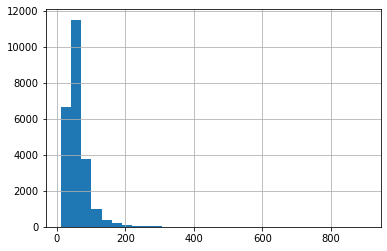

In [36]:
#код ревьюера
data2 = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
(data2['total_area']).hist(bins=30);

In [37]:
data2['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Ух ты! А слона то я и не заметила))) Сколько квадратов! Предлагаю попробовать применить тут такой способ, в котором все значения больше 400 поменяются на деленные на 3.

In [38]:
data2.loc[data['total_area'] >= 400, 'total_area'] = data2.loc[data2['total_area'] >= 400, 'total_area'] / 3

In [39]:
data2['total_area'].describe()

count    23699.000000
mean        59.985795
std         32.613645
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        399.000000
Name: total_area, dtype: float64

Применим формулу на основном датафрейме

In [40]:
data.loc[data['total_area'] >= 400, 'total_area'] = data.loc[data['total_area'] >= 400, 'ceiling_height'] / 3

In [41]:
data2['total_area'].describe()

count    23699.000000
mean        59.985795
std         32.613645
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        399.000000
Name: total_area, dtype: float64

### Посчитайте и добавьте в таблицу новые столбцы

In [42]:
# добавили столбец, посчитали в нем стоимость квадратного метра
# поменяла формат на int
data['sm_price'] = data['last_price'] / data['total_area']
data['sm_price'] = data['sm_price'].astype(int)

In [43]:
# создали столбец дня недели, месяца и года публикации объявления
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [44]:
# написали функцию - категория этажа квартиры со значениями: «первый», «последний», «другой»;
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
# категоризуем этажи с помощью функции и применяем к каждой строке датафрейма через axis = 1 
data['floor_type'] = data.apply(floor_group, axis=1)


In [45]:
# добавляем колонку с расстоянием до центра в километрах
# округляем до целого
data['center_km'] = data['city_centers_nearest'] / 1000
data['center_km'] = data['center_km'].fillna(value=0).astype(int)


In [46]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sm_price,weekday,month,year,floor_type,center_km
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370,3,3,2019,другой,16
1,7,3350000,40.4,2018-12-04,1,2.63,11.0,18.6,1,NaN,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920,1,12,2018,первый,18
2,10,5196000,56.0,2015-08-20,2,2.70,5.0,34.3,4,NaN,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785,3,8,2015,другой,13
3,0,64900000,159.0,2015-07-24,3,2.70,14.0,NaN,9,NaN,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176,4,7,2015,другой,6
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018,другой,8


### Проведите исследовательский анализ данных

In [47]:
data[['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floor', 'floors_total', 'airports_nearest', 'parks_nearest', 'first_day_exposition', 'city_centers_nearest', 'weekday', 'month']].describe()

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height,floor,floors_total,airports_nearest,parks_nearest,city_centers_nearest,weekday,month
count,23699.000000,21796.000000,21421.000000,2.369900e+04,23699.000000,23558.000000,23699.000000,23613.000000,18157.000000,8079.000000,18180.000000,23699.000000,23699.000000
mean,59.805533,34.457852,10.569807,6.541549e+06,2.070636,2.708218,5.892358,10.673824,28793.672193,490.804555,14191.277833,2.569307,6.400101
std,32.462936,22.030445,5.905438,1.088701e+07,1.078405,0.339474,4.885249,6.597173,12630.880622,342.317995,8608.386210,1.789082,3.491561
min,0.833333,2.000000,1.300000,1.219000e+04,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,181.000000,0.000000,1.000000
25%,40.000000,18.600000,7.000000,3.400000e+06,1.000000,2.550000,2.000000,5.000000,18585.000000,288.000000,9238.000000,1.000000,3.000000
50%,52.000000,30.000000,9.100000,4.650000e+06,2.000000,2.700000,4.000000,9.000000,26726.000000,455.000000,13098.500000,3.000000,6.000000
75%,69.600000,42.300000,12.000000,6.800000e+06,3.000000,2.700000,8.000000,16.000000,37273.000000,612.000000,16293.000000,4.000000,10.000000
max,399.000000,409.700000,112.000000,7.630000e+08,19.000000,24.000000,33.000000,60.000000,84869.000000,3190.000000,65968.000000,6.000000,12.000000


count    23699.000000
mean        59.805533
std         32.462936
min          0.833333
25%         40.000000
50%         52.000000
75%         69.600000
max        399.000000
Name: total_area, dtype: float64

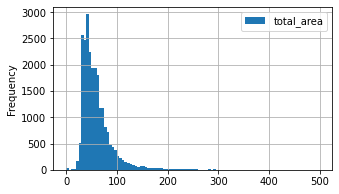

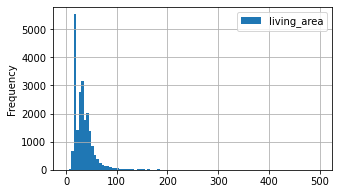

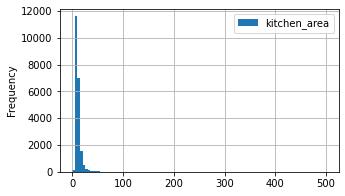

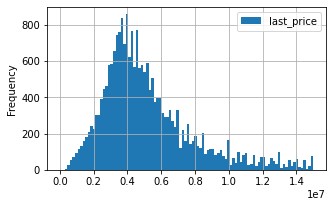

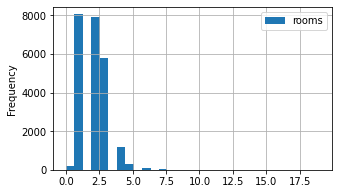

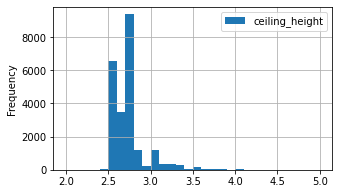

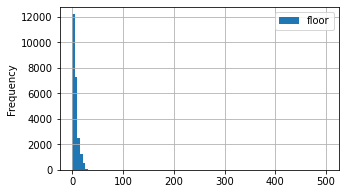

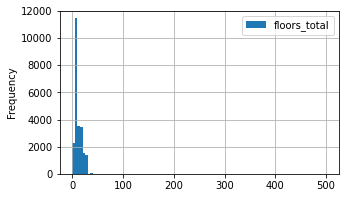

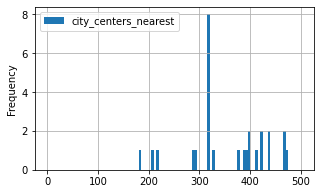

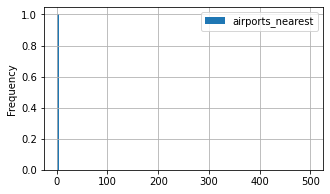

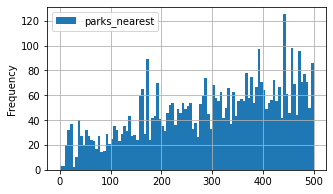

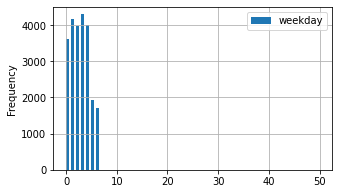

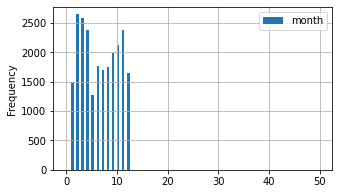

In [48]:
# изучим параметры общей площади
data
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,500))
data['total_area'].describe()
# изучим параметры жилой площади
data.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,500))
data['total_area'].describe()
# изучим параметры площади кухни
data.plot(y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,500))
data['total_area'].describe()
# изучим прайс
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,15000000), figsize = (5,3))
data['last_price'].describe()
#изучим число комнат
data
data.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, figsize = (5,3))
data['rooms'].describe()
#изучим высоту потолков
data
data.plot(y = 'ceiling_height', kind = 'hist', bins = 30, range = (2,5), grid=True, figsize = (5,3))
data['ceiling_height'].describe()
#изучим этаж
data
data.plot(y = 'floor', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,500))
data['total_area'].describe()
#изучим этажность дома
data
data.plot(y = 'floors_total', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,500))
data['total_area'].describe()
# изучим расстояние до центра города в километрах;
data
data.plot(y = 'city_centers_nearest', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,500))
data['total_area'].describe()
# изучим расстояние до ближайшего аэропорта
data
data.plot(y = 'airports_nearest', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,500))
data['total_area'].describe()
#изучим расстояние до ближайшего аэропорта
data
data.plot(y = 'parks_nearest', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,500))
data['total_area'].describe()
data
data.plot(y = 'weekday', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,50))
data['total_area'].describe()
data
data.plot(y = 'month', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,50))
data['total_area'].describe()




Вывод:

Общая площадь в нашей выборке колеблется от 12 до 399 м2, среднее значение 59,8, а медиана 52 м2. Квартира в 399 м2 - вполне реальная инвестиция.  

Площадь кухни в нашей выборке колеблется от 1,3 до 107 м2, среднее значение 10,5, а медиана 9 м2. Считать выбросом кухню, размером в 107 м2 не стала бы, такая кухня имеет место быть. Я сразу представила огромный стол с обеденной группой, зону готовки, старинный книжный шкаф из белого дуба и терассу, которая идет в счет кухни по метражу. Собираемся и едем покупать?  

Что какается жилой площади, то минимальный порог в 2 квадратных метра (10-12 м2 общей площади) вполне реален, мода на такие мини-студии активно насаждалась в крупных городах, а связано это, вероятнее всего, с высокой ценой за квадратный метр жилья.    

Цены на недвижимость имеют среднее значение в 6,5 млн руб., медиана 4,6 млн руб. Представление действительных чисел в виде мантиссы и порядка.  

Высота потолков в среднем составляет 2,7 м, медиана 2,7 м. 
Количество комнат колеблется от 1 до 9. Больше всего двухкомнатных и однокомнатных квартир.  

Этаж продаваемых объектов средняя 5,8, медиана 4.  

Относительно общего количества этажей в доме - минимальное значение 1, а максимальное - 60 этажей.
Удивительно, что я не знала о том факте, что в Санкт-Петербурге действительно существует высокое здание - 
«Лахта-центр» — общественно-деловой комплекс, расположенный в Лахте (один из исторических районов на западе Приморского района Санкт-Петербурга), в здании располагается штаб-квартира ПАО «Газпром». Это комплекс с переменной этажностью. Может ли быть такое, что максимальные значения как раз идут оттуда? Вполне, на мой взгляд.  

С удаленностью от центра всё более чем ясно, среднее - 14,2, медиана - 13,1 км. В самом сердечке Спб есть шансы приобрести, всего-навсего 181 метр!  

Расстояние до ближайшего аэропорта я бы уточнила у сотрудников, потому что минимальное значение - 0, похоже на ошибку в данных.  

Расстояние до ближайшего парка - в среднем 487 и в медианном значении 451 метров. Очевидно, что парков нужно больше. Хотя прогулка длинной в 487 метров не так уж и далека, особенно в хорошей компании.   

День недели: дороже всего квартиры, опубликованные в среду, дешевле всего - в субботу.  
Месяц: дороже всего квартиры, продающиеся в ноябре и весенние месяцы, дешевле всего - в летние месяцы.  

 Во всех графиках мы наблюдаем распределение данных Гаусса. 
Суть получившегося графика проста — средним значениям параметра соответствует максимальная плотность распределения. Простыми словами распределение данных нормальное, есть выбросы но они не сильно влияют на данные. В общих чертах всё готово к дальнейшим исследованиям.
***

Изучим, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление. 


In [49]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [50]:
data['days_exposition'].fillna(0, inplace=True)
data['days_exposition'] = data['days_exposition'].astype(int)
# необходимые меры для дальнейшего исследования

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

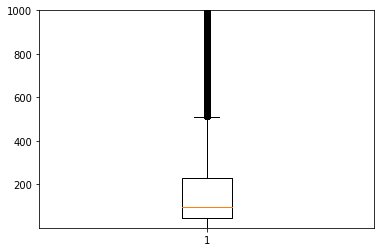

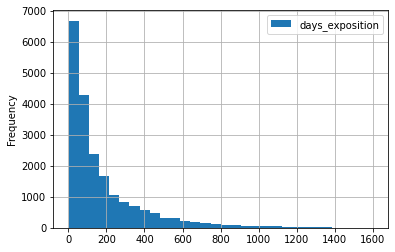

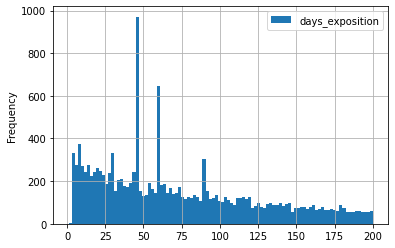

In [51]:
#диаграмма размаха
plt.boxplot(data[data['days_exposition']!=0]['days_exposition'])
plt.ylim(1,1000)

data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))

#среднее значение, медиана и межквартильный размах
data[data['days_exposition']!=0]['days_exposition'].describe()




Вывод: 
Мы отчетливо видим распределение Пуассона. Среднее значение - 180 дней, медиана - 95 дней. Сделав гистограмму со значениями от 0 до 200 с количествомвом корзин 100, обнаружили выбивающиеся значения и методом value_counts убедились в этом - у нас аномалии, выбивающиеся значения.
С этими датами явно непорядок. На мой взгляд нужно уточнить у коллег, которые собирают данные по days_exposition.


А теперь проделаем то же самое, но с новеньким отфильтрованным датафреймом

count    18454.000000
mean       195.803349
std        226.760010
min          1.000000
25%         44.000000
50%        114.000000
75%        259.000000
max       1580.000000
Name: days_exposition, dtype: float64

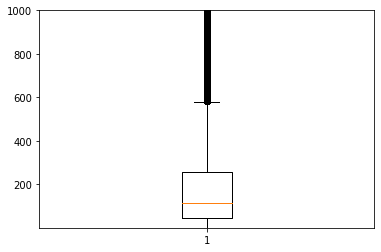

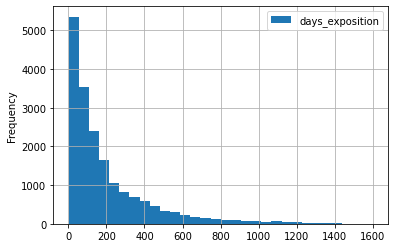

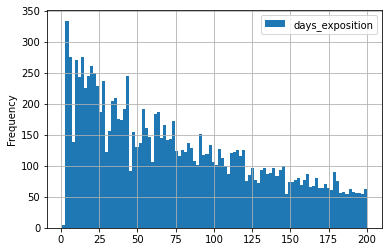

In [52]:
# фильтруем данные от аномалий и запишем их в новый датафрейм good_data
new_data = data.query('days_exposition != 45 and days_exposition != 30 and days_exposition != 60 and days_exposition != 90 and days_exposition != 7 and days_exposition != 0')

#диаграмма размаха
plt.boxplot(new_data['days_exposition'])
plt.ylim(1,1000)

#гистограммы
new_data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))
new_data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))

#среднее значение, медиана и межквартильный размах
new_data['days_exposition'].describe()

Вестимо, всплески поубавились в значительной мере. И значения среднего и медианы поменялись, было среднее - 180, а стало - 195. Медиана была - 95, а стала - 114.

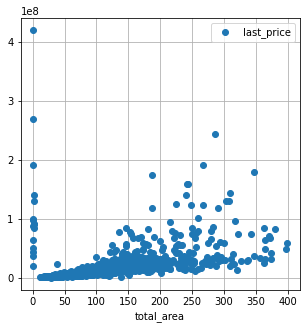

Корреляция цены и площади: 

            last_price  total_area
last_price     1.00000     0.54326
total_area     0.54326     1.00000 



In [53]:
# зависимость цены и площади
(
    data.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и площади:','\n')
print(data.pivot_table(index='floor', values=['total_area', 'last_price']).corr(),'\n')

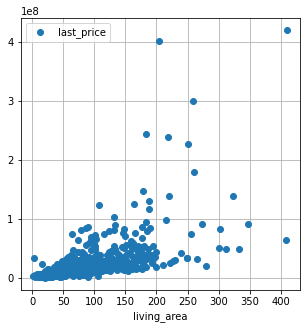

Корреляция цены и жилой площади: 

             last_price  living_area
last_price     1.000000     0.655849
living_area    0.655849     1.000000 



In [54]:
# зависимость цены и общей площади
(
    data.pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и жилой площади:','\n')
print(data.pivot_table(index='floor', values=['living_area', 'last_price']).corr(),'\n')

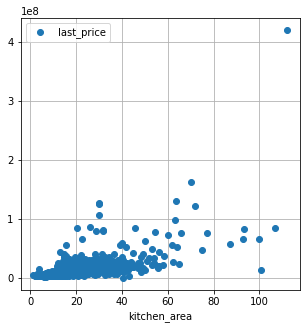

Корреляция цены и площади кухни: 

              kitchen_area  last_price
kitchen_area      1.000000    0.361686
last_price        0.361686    1.000000 



In [55]:
# зависимость цены и площади кухни
(
    data.pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и площади кухни:','\n')
print(data.pivot_table(index='floor', values=['kitchen_area', 'last_price']).corr(),'\n')

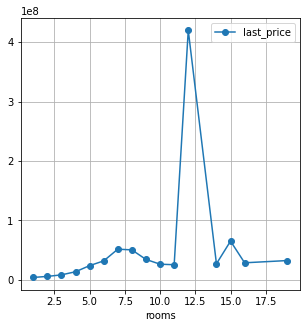

Корреляция цены и числа комнат: 

            last_price     rooms
last_price    1.000000  0.435171
rooms         0.435171  1.000000 



In [56]:
# зависимость цены от числа комнат
(
    data.query('rooms > 0').pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и числа комнат:','\n')
print(data.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')

Зависимость резко повышается в области 11 комнат

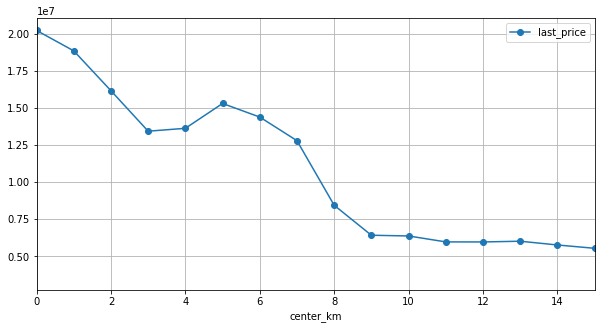

In [57]:

# выбираем Санкт-Петербург, смотрим на график, где указана средняя стоимость для каждого км
(
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='center_km', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))
)
plt.show()

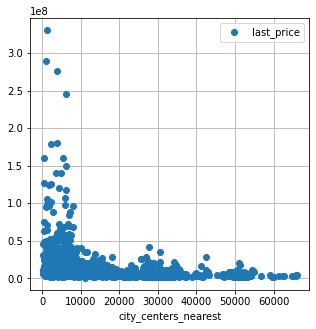

Корреляция цены и удалённости от центра: 

                      city_centers_nearest  last_price
city_centers_nearest                1.0000      0.1588
last_price                          0.1588      1.0000 



In [58]:
# Зависимость цены от удалённости от центра
(
    data.pivot_table(index='city_centers_nearest', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и удалённости от центра:','\n')
print(data.pivot_table(index='floor', values=['city_centers_nearest', 'last_price']).corr(),'\n')

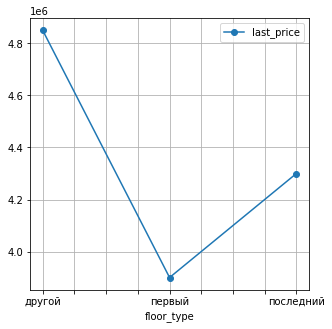

In [59]:
# Зависимость цены от этажа
(
    data.pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

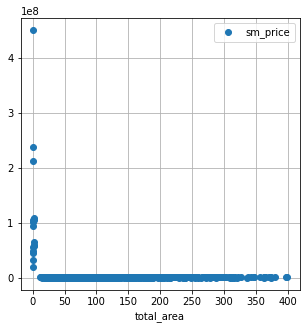

Корреляция цены за квадрат площади: 

            sm_price  total_area
sm_price    1.000000   -0.067561
total_area -0.067561    1.000000 



In [60]:
# считаем зависимость цены за квадрат площади
(
    data.pivot_table(index='total_area', values='sm_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены за квадрат площади:','\n')
print(data.pivot_table(index='floor', values=['total_area', 'sm_price']).corr(),'\n')



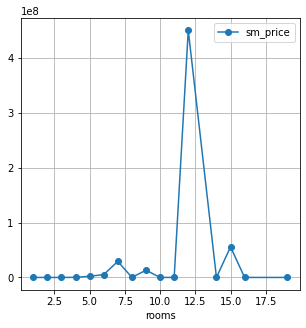

Корреляция цены за квадрат и числа комнат: 

             rooms  sm_price
rooms     1.000000  0.025467
sm_price  0.025467  1.000000 



In [61]:
# Зависимость цены за квадрат от числа комнат
(
    data.query('rooms > 0').pivot_table(index='rooms', values='sm_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены за квадрат и числа комнат:','\n')
print(data.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'sm_price']).corr(),'\n')

Вывод: 
Наблюдаем, что зависимость - согласно корреляции Пирсона - 0.5. Т.е. зависимость от цены все же есть. 

Зависимость жилой площади и цены с корреляцией - 0,75 говорит нам о том, что количество жилой площади имеет значительное влияние на цену в отличии от площади кухни, где корреляция 0,2.
 
Число комнат вообще сомнительное исследование, можно купить трехкомнатную квартиру площадью 57 м2 и квартиру-студию идентичной площадью.  

Квартиры в центре стоят дорого, чем дальше от центра, тем ниже стоимость.  

Первый этаж непосредственно влияет на стоимость квартиры - в среднем квартиры на 1-м этаже значительно дешевле. Чуть дороже последний этаж. Наибольшая стоимость у квартир, расположенных не на 1-м и не на последнем этаже.  

Цена за квадратный метр недвижимости выше у однокомнатных квартир и 5-7 комнатных квартир. Однокомнатные квартиры - оптимальный вариант для вхождения, а 5-7 комнат прерогатива скорее недвижимости премиу-класса.

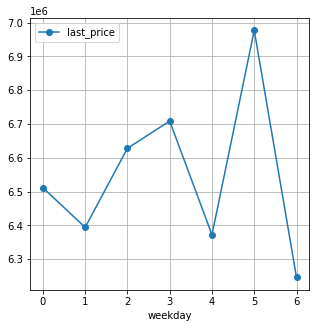

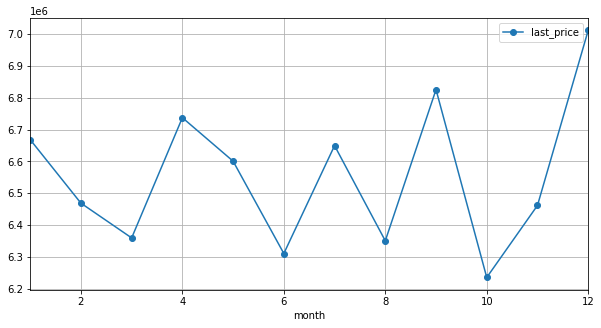

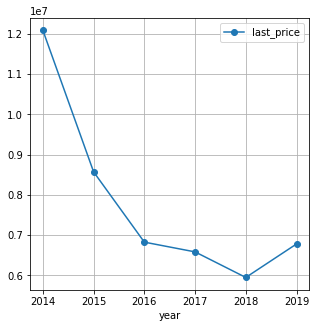

In [62]:
# смотрим зависимость от дня размещения
(
    data.pivot_table(index='weekday', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
# смотрим зависимость от месяца размещения
(
    data.pivot_table(index='month', values='last_price')
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
)
plt.show()
# смотрим зависимость от года размещения
(
    data.pivot_table(index='year', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

Вывод: 

Результат отличается от общей выборки. Начало недели плавно повышается в цене до вторника. Далее цена снижается со среды, и в четверг резко набирает обороты. Пятница - максимум цены. По субботам стоимость самая низкая.  

Полагаю, что стоимость выставленной на продажу недвижимости зависит от общей активности людей, так как именно в рабочие дни мы видим более высокие цены, следовательно именно высокий спрос и деловая активность именно в эти дни (середина недели), формируют стоимость предложения.

Зависимость цены от месяца публикации - сентябрь и декабрь самые жирные: цены на квартиры, чьи объявления о продаже были опубликованы в декабре, выше, чем по остальным месяцам. Особенно выделяется медиана цен на квартиры по июню и октябрю - довольно низкие в сравнении с другими месяцами, возможно все уезжают в отпуска именно в эти месяцы.  

Зависимость цены от года публикации, начиная с 2014 года идет заметное падение и в 2018 график показывает рост. На цену влияют различные факторы, от кризиса до негативных или позитивных новостей.
***

Считаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделяем населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [63]:
top10 = data['locality_name'].value_counts().index.tolist()[:10]
data['price_of_m2'] = data['last_price']/data['total_area']
mean10_metrics = [data[data['locality_name'] == city]['price_of_m2'].median().round(2) for city in top10]
mean10_prices = [data[data['locality_name'] == city]['last_price'].median() for city in top10]
frame = {'Город': top10, 'Средняя цена за кв.м., тыс. руб.': mean10_metrics, 'Средняя цена за квартиру, тыс. руб.': mean10_prices}
dataframe = pd.DataFrame(frame).sort_values(by='Средняя цена за кв.м., тыс. руб.', ascending=False)
dataframe

,Город,"Средняя цена за кв.м., тыс. руб.","Средняя цена за квартиру, тыс. руб."
0,Санкт-Петербург,104821.80,5500000.0
4,Пушкин,100000.00,5180000.0
8,деревня Кудрово,91860.47,3790000.0
6,поселок Парголово,91642.86,4100000.0
1,поселок Муриноино,85878.46,3400000.0
2,поселок Шушары,76876.17,3950000.0
5,Колпино,74723.75,3600000.0
7,Гатчина,67796.61,3100000.0
3,Всеволожск,65789.47,3450000.0
9,Выборг,58158.32,2897000.0


Видим, что самые дорогие квартиры, а так же стоимость квадратного метра в Санкт-Петербурге и Пушкин. Чем дальше от города, тем, как правило, дешевле. В Всеволожске средняя цена за квадратный метр в 1,5 раза ниже, чем в Санкт-Петербурге.

Теперь изучим предложения по недвижимости. Для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге (locality_name). Наша задача — вычленить центр. Создадим столбец с расстоянием до центра в километрах: округлим до целых значений. После этого посчитаем среднюю цену для каждого километра. Построим график: он покажет, как цена зависит от удалённости от центра. Определим границу, где график более изменчив, там и центральная зона.

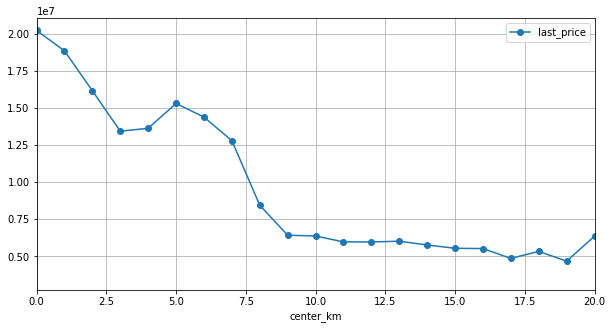

In [64]:

# берем созданную ранее сводную таблицу и указываем среднюю стоимость для каждого км на графике
(
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='center_km', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,20), figsize=(10, 5))
)
plt.show()

Вывод: видим явную зависимость стоимости квадратного метра от близости к центру! Чем ближе к центру, тем выше стоимость!

Центральную зону можно определить расстоянием в 7 км. Чем дальше от этого расстояния, тем дешевле цена.

Оценим столбец last_price, чтоб досконально оценить влияние разных параметров на цену:

<AxesSubplot:>

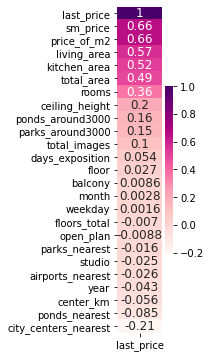

In [65]:
plt.figure(figsize=(1,6))
sns.heatmap(data.corr()[['last_price']].sort_values(by='last_price', ascending=False), cmap="RdPu", 
            annot=True, annot_kws={'size':12})

Из построенных выше данных, мы видим, что цена напрямую зависит от цены за квадратный метр. Соответственно и от площади, чем больше площадь, тем больше цена. Далее идет площадь кухни и количество комнат.  Меньшее влияние оказывает наличие парков и водоемов близ квартиры.
Влияние оказывает близость к центру - чем ближе к центру, тем выше цена и наоборот. 


### Общий вывод


Мы обработали полученный архив данных, обработали его пропущенные значения. Произвели замену типов данных там, где это необходимо для исследовательского анализа. Посчитали и добавили в таблицу цену квадратного метра жилья, вывели из столбца даты день недели, месяц и год размещения объявлений, добавили категории по этажам квартир. 

Исследовали такие параметры, как наличие выбивающихся значений - площадь, цена, число комнат, высота потолков. Определили аномалии в параметрах, исправили их на адекватные значения.   

Изучая данные по апартаментам, провели исследование, взяв данные с сайта Яндекс Недвижимость, в ходе которого решили не менять данные.   

Мы выяснили, что цена так же повышается, с увеличением площади квартиры. 

Отбросили аномальные значения в столбцах с общей площадью и высотой потолков.

Выяснили, что чем больше цена за квадратный метр, тем выше цена.	Чем выше доля жилой площади или площадь кухни, чем больше комнат тем, соответственно, выше цена.  	

Выяснили, что на первом этаже квартиры дешевле, а на последнем этаже чуть дороже, чем на первом, но дешевле чем на остальных.  

Выяснили, что чем ближе к центру, тем ценник дороже. Не в центре, более 7 км от центра, квартиры стоят на порядок дешевле.	 

Квартиры, которые разместили к продаже в будние дни, в среднем дороже, чем те, которые разместили в выходные.	
Квартиры, которые разместили к продаже в летние месяцы и в октябре, в среднем дешевле, чем размещенные в любые другие месяцы, например сентябрь или декабрь.  

Та недвижимость, которую разместили в 2014 году, самая дорогая. В период 2015-2018 было падения рынка недвижимости(кризис). 2019г. - цены пошли вверх впервые после наступления кризиса, т.е. наступил очередной виток цикла развития недвижимости.  


